In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from itertools import cycle

In [2]:
! rsync --progress "bluemoon-user1.uvm.edu:thesis/data/hizanidis_params.pkl" "../../data/hizanidis_params.pkl"

hizanidis_params.pkl
      128867 100%  122.90MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 1148 bytes  received 849 bytes  3994.00 bytes/sec
total size is 128867  speedup is 64.53


In [3]:
with open("../../data/hizanidis_params.pkl", "rb") as f:
    params = pickle.load(f)

params.head()

,alpha,beta,metastability,chimera,max_phase
0,1.053,0.656,0.059600,0.062478,25132.741229
1,2.835,0.431,0.075429,0.080300,25132.741229
2,0.770,0.513,0.058560,0.061334,25132.741229
3,1.053,0.349,0.080334,0.085282,25132.741229
4,1.013,0.082,0.059560,0.062754,25132.741229


In [4]:
good = params[params["max_phase"] <= 2*np.pi]

In [5]:
good.shape

(620, 5)

In [6]:
good.sort_values("chimera", ascending=False)

,alpha,beta,metastability,chimera,max_phase
1720,0.041,0.021,0.070766,0.074749,6.283185
2734,0.851,0.021,0.067366,0.069392,6.283185
3030,0.810,0.021,0.066662,0.068546,6.283185
2343,0.608,0.390,0.069052,0.068272,6.283185
795,0.770,0.041,0.065538,0.067631,6.283185
1351,0.810,0.062,0.065212,0.067396,6.283185
1039,0.608,0.451,0.067431,0.067030,6.283185
1506,0.648,0.082,0.064980,0.067024,6.283185
1190,0.729,0.062,0.065076,0.066942,6.283185
1684,0.567,0.062,0.064568,0.066814,6.283185


In [23]:
c = params.pivot_table(values="chimera", index="beta", columns="alpha")

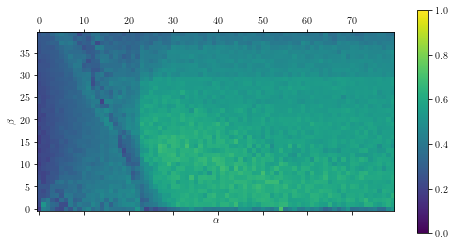

In [24]:
plt.matshow(c.values[:, :]*7, origin="lower", vmin=0, vmax=1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

In [25]:
m = params.pivot_table(values="metastability", index="beta", columns="alpha")

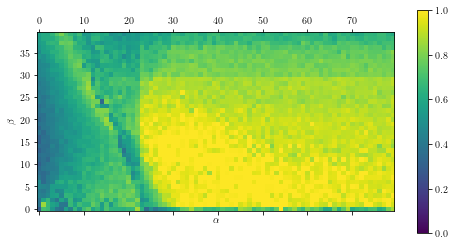

In [26]:
plt.matshow(m.values[:, :]*12, origin="lower", vmin=0, vmax=1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

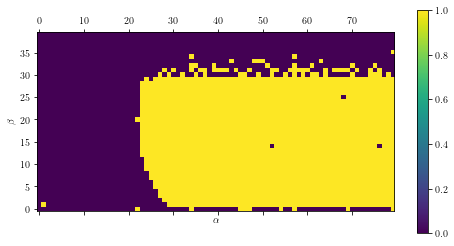

In [27]:
plt.matshow(np.heaviside(c.values - 1/14, 0), origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

In [11]:
p = params.pivot_table(values="max_phase", index="beta", columns="alpha")

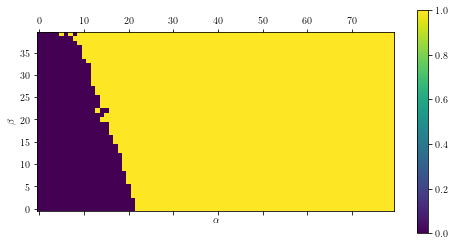

In [12]:
plt.matshow(np.heaviside(p.values[:, :] - 2*np.pi, 0), origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

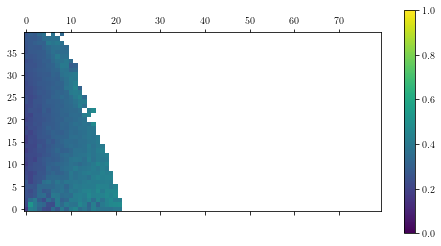

In [32]:
v = c.values.copy()
v[p.values >= 2*np.pi] = np.nan
plt.matshow(7*v, origin="lower", vmin=0, vmax=1)
plt.colorbar()

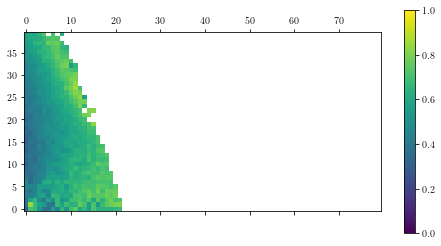

In [33]:
v = m.values.copy()
v[p.values >= 2*np.pi] = np.nan
plt.matshow(12*v, origin="lower", vmin=0, vmax=1)
plt.colorbar()